# SYSTEMS OF LINEAR EQUATIONS

# ~ 1.1. Linear Algebra Applied ~

Welcome to the first lesson! This week, we'll explore **systems of linear equations** and their various representations, such as lines on a plane or an array of numbers called a **matrix**. We will also differentiate between **singular** and **non-singular** systems, a critical concept in linear algebra.

Linear algebra is arguably the most essential field of mathematics for machine learning. Its applications are vast and foundational to how many algorithms work. This course will use machine learning examples to provide context for the mathematical concepts you'll be learning.

## Linear Regression: A Practical Example

One of the most common machine learning models, **linear regression**, provides a perfect entry point into systems of linear equations.

Linear regression is a **supervised machine learning** technique. This means we start with a dataset containing known inputs (features) and a corresponding output (target). The goal is to discover the underlying relationship between them.

### Single-Feature Linear Regression

Imagine we want to predict the electrical power output of a wind turbine based on a single feature: wind speed.

* **x-axis**: Wind Speed (our input feature)
* **y-axis**: Power Output (our target)

If we plot our collected data points, we might see a clear pattern. The objective of linear regression is to find the **line of best fit** that models this data. The equation for this line is the familiar:

$$ y = mx + b $$

In machine learning, this is often written as:

$$ y = wx + b $$

* `y`: The predicted output (Power Output)
* `x`: The input feature (Wind Speed)
* `w`: The **weight**, a constant that scales the input feature.
* `b`: The **bias**, a constant that shifts the line up or down.

The goal is to find the optimal values for the weight (`w`) and bias (`b`) that make the line fit the data as closely as possible. Let's visualize this:

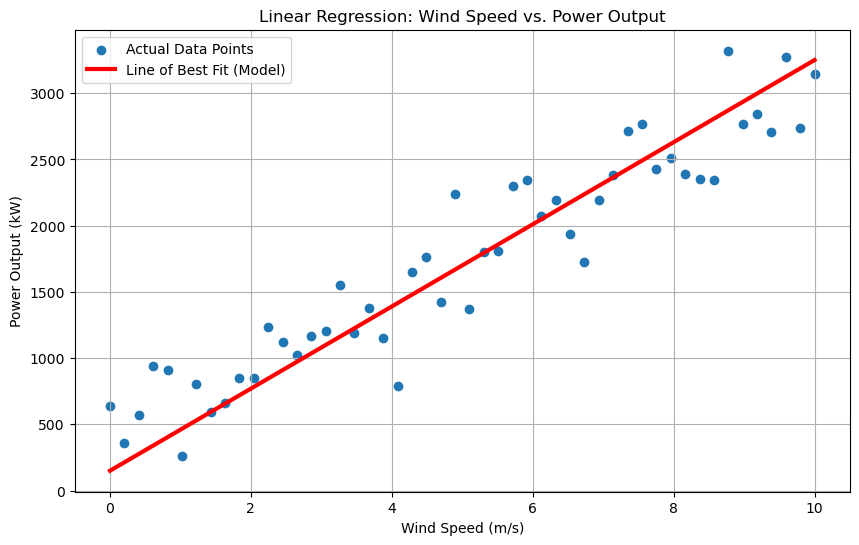

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# --- Generate some synthetic data ---
# We'll create data that looks like the wind turbine example.
np.random.seed(0) # for reproducibility
wind_speed = np.linspace(0, 10, 50) # 50 data points from 0 to 10
# Create a linear relationship with some random noise
power_output = 300 * wind_speed + 200 + np.random.normal(0, 250, 50)

# --- Define a hypothetical model (our line of best fit) ---
# In a real ML problem, we would "learn" these values.
# For now, we'll just choose plausible values to draw the line.
w = 310
b = 150

# Calculate the predicted power output based on our model
predicted_output = w * wind_speed + b

# --- Plot the results ---
plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(wind_speed, power_output, label='Actual Data Points')

# Plot the line of best fit from our model
plt.plot(wind_speed, predicted_output, color='red', linewidth=3, label='Line of Best Fit (Model)')

# Add labels and title for clarity
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('Linear Regression: Wind Speed vs. Power Output')
plt.legend()
plt.grid(True)
plt.show()

### Multi-Feature Linear Regression

In most real-world scenarios, you'll use more than one feature to make a prediction. Let's add **temperature** to our wind turbine model. The equation now needs a new weight for the new feature:

$$ y = w_1(\text{wind\_speed}) + w_2(\text{temperature}) + b $$

With two features, our model is no longer a line in a 2D plane. It's now a **plane** in a 3D space. We can extend this idea to any number of features ($n$), such as pressure, humidity, etc. The generalized equation for $n$ features becomes:

$$ y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b $$

Here, $x_1, x_2, \dots, x_n$ represent the different input features. Conceptually, it works the same way: we need to find the right values for all the weights ($w_1, \dots, w_n$) and the bias ($b$) to make accurate predictions.

## From Regression to Systems of Equations

In a typical machine learning dataset, you don't have just one data point; you have many records (let's say $m$ records). Each record gives us a complete equation where the feature values ($x$'s) and the target value ($y$) are known. The unknowns we need to solve for are the weights and the bias.

We can write one equation for each record in our dataset. We use a superscript in parentheses to denote the record number. **Note: this is an index, not an exponent.**

* **Record 1**: $w_1x_1^{(1)} + w_2x_2^{(1)} + \dots + w_nx_n^{(1)} + b = y^{(1)}$
* **Record 2**: $w_1x_1^{(2)} + w_2x_2^{(2)} + \dots + w_nx_n^{(2)} + b = y^{(2)}$
* ...
* **Record m**: $w_1x_1^{(m)} + w_2x_2^{(m)} + \dots + w_nx_n^{(m)} + b = y^{(m)}$

Ideally, we want to find a single set of weights ($w_1, \dots, w_n$) and a single bias ($b$) that solve all $m$ equations at the same time (or come as close as possible).

This collection of multiple linear equations that we want to solve simultaneously is a fundamental concept known as a **system of linear equations**. This will be our main topic of study.

# ~ 1.2. Systems of Equations and Vector/Matrix Notation ~

In the previous section, we established that a linear regression model with $n$ features and $m$ data records can be represented as a system of linear equations:

* **Record 1**: $w_1x_1^{(1)} + w_2x_2^{(1)} + \dots + w_nx_n^{(1)} + b = y^{(1)}$
* **Record 2**: $w_1x_1^{(2)} + w_2x_2^{(2)} + \dots + w_nx_n^{(2)} + b = y^{(2)}$
* ...
* **Record m**: $w_1x_1^{(m)} + w_2x_2^{(m)} + \dots + w_nx_n^{(m)} + b = y^{(m)}$

An important thing to remember is that the **weights ($w$)** and the **bias ($b$)** are the **same for all equations**. We are looking for a single set of these values that works for every record in our dataset. The features ($x$) and targets ($y$) are unique to each row.

## A More Compact Notation: Vectors and Matrices

Writing out the full system of equations can be cumbersome. Linear algebra gives us a much more efficient way to represent this using **vectors** and **matrices**.

For now, you can think of them simply as:
* **Vector**: A list of numbers.
* **Matrix**: A grid of numbers (a collection of vectors).

Using this, we can simplify our entire system of equations into a single, elegant line:

$$ y = WX + b $$

* $W$ is now a **vector** containing all the weights ($w_1, w_2, \dots, w_n$).
* $X$ is a **matrix** where each row contains the features for a single data record.
* $b$ is the bias term.
* $y$ is a **vector** of all the target outputs ($y^{(1)}, y^{(2)}, \dots, y^{(m)}$).

This compact form is the backbone of how we perform calculations in machine learning.

*(Note: If you're already familiar with linear algebra, you might notice we're being a bit imprecise here. Depending on how we define our vectors and matrices, we might need to use a transpose ($W^T$) to make the math work. We'll ignore that detail for now to focus on the core concept.)*

## A New Problem: What Are Your Scores? 🤔

Let's frame a new problem to explore these concepts. Imagine you took three courses: **Linear Algebra**, **Calculus**, and **Probability & Statistics**. I know your scores, but I won't tell you directly. Instead, I'll give you these three facts:

1.  Your Linear Algebra score plus your Calculus score minus your Probability & Statistics score is **6**.
2.  Your Linear Algebra score minus your Calculus score plus double your Probability & Statistics score is **4**.
3.  Four times your Linear Algebra score minus double your Calculus score plus your Probability & Statistics score is **10**.

Can we use this information to figure out your exact scores? Let's turn these sentences into a system of linear equations.

## Formulating the System of Equations

Let's assign variables to our unknown scores:
* $a$ = Linear Algebra score
* $c$ = Calculus score
* $p$ = Probability & Statistics score

Now we can translate the sentences into equations:

1.  $a + c - p = 6$
2.  $a - c + 2p = 4$
3.  $4a - 2c + p = 10$

This is a classic system of linear equations. Since we have 3 distinct equations and 3 unknowns, we might be able to solve this analytically.

## Relating This Back to Machine Learning

How does our course-score problem relate to the linear regression model? We can map the components directly:

* **Weights ($W$)**: These are the **unknowns** we are solving for. In this case, the weights are our scores: $a, c, p$. They are consistent across all equations.
* **Features ($X$)**: These are the **coefficients** that multiply our weights. For the first equation, the features are `(1, 1, -1)`. For the second, they are `(1, -1, 2)`, and so on.
* **Targets ($y$)**: These are the **results** on the other side of the equal sign. In this case, our target vector is `(6, 4, 10)`.
  

# ~ 1.3. Systems of Sentences - An Analogy ~

Before we dive deep into the algebra of linear equations, let's start with a more intuitive idea: thinking of equations as sentences.

A single sentence (or equation) provides a piece of information. A **system of sentences** (or equations) combines multiple pieces of information. The way these sentences interact to build a complete picture is very similar to how equations work together. The goal is always to get as much clear information as possible.

## Simple Systems: What's the Animal's Color?

Let's start with a simple scenario. Assume you have one dog and one cat, and each animal has only one color. Your goal is to figure out their colors based on the information provided.

---

### System 1: A Complete System
* **Sentence 1:** "The dog is black."
* **Sentence 2:** "The cat is orange."

**Analysis:** We have 2 sentences and they give us 2 distinct pieces of information. This is a **complete** system. We know everything we need to.

---

### System 2: A Redundant System
* **Sentence 1:** "The dog is black."
* **Sentence 2:** "The dog is black."

**Analysis:** We have 2 sentences, but the second one adds no new information. It just repeats the first. This system only provides 1 unique piece of information. It is **redundant**.

---

### System 3: A Contradictory System
* **Sentence 1:** "The dog is black."
* **Sentence 2:** "The dog is white."

**Analysis:** The two sentences conflict with each other. Since we know the dog can only have one color, this information is impossible to resolve. The system is **contradictory**.

## New Terminology: Singular vs. Non-Singular

The amount of information a system carries is critical. This leads us to two very important terms that you will use throughout your study of linear algebra.

* **Non-singular System** ✅
    A system that is **complete**. It carries as many unique pieces of information as it has sentences (or equations). It's the most informative and useful type of system.

* **Singular System** ⚠️
    A system that is either **redundant** or **contradictory**. It is less informative than a non-singular system because information is either repeated or nonsensical.

Based on these definitions:
* System 1 ("The dog is black.", "The cat is orange.") is **non-singular**.
* System 2 ("The dog is black.", "The dog is black.") is **singular**.
* System 3 ("The dog is black.", "The dog is white.") is **singular**.

## Systems with More Sentences

This concept scales up to any number of sentences. Let's consider a new scenario with three animals: a dog, a cat, and a bird.

* **System 1:**
    1.  "The dog is black."
    2.  "The cat is orange."
    3.  "The bird is red."
    *  **Result:** 3 sentences, 3 pieces of info. This is **complete** and **non-singular**.  
`---`
* **System 2:**
    1.  "The dog is black."
    2.  "The dog is black."
    3.  "The bird is red."
    * **Result:** 3 sentences, but only 2 pieces of info. This is **redundant** and **singular**.  
`---`
* **System 3:**
    1.  "The dog is black."
    2.  "The dog is black."
    3.  "The dog is black."
    * **Result:** 3 sentences, but only 1 piece of info. This is highly **redundant** and **singular**.  
`---`
* **System 4:**
    1.  "The dog is black."
    2.  "The dog is white."
    3.  "The bird is red."
    * **Result:** The first two sentences conflict. This is **contradictory** and **singular**.  
 
> **Future Concept:** Notice that System 3 is "more redundant" than System 2. There is a mathematical measure for this called **rank**, which you will learn about later.

## A Logic Puzzle 🧩

Systems aren't always straightforward. Sometimes you need to deduce the information. Consider this system:

* **Sentence 1:** "Between the dog, the cat, and the bird, one of them is red."
* **Sentence 2:** "Between the dog and the cat, one of them is orange."
* **Sentence 3:** "The dog is black."

Based on these sentences, can you answer these two questions?
1.  What color is the bird?
2.  Is this system singular or non-singular?

## Solution to the Logic Puzzle

Let's solve this step-by-step:

1.  **Start with the most direct fact.** Sentence 3 tells us plainly: **The dog is black**.

2.  **Use that information in the next sentence.** Sentence 2 says one of the dog or cat is orange. Since we now know the dog is black, it logically follows that **the cat must be orange**.

3.  **Use both facts in the final sentence.** Sentence 1 says one of the three animals is red. We've established the dog is black and the cat is orange. Therefore, **the bird must be red**.

### Answering the Questions

1.  **What color is the bird?** The bird is **red**.
2.  **Is the system singular or non-singular?** We started with 3 sentences and were able to determine 3 unique pieces of information (the color of each of the three animals). The system contains no redundancies or contradictions. Therefore, it is a **complete** system and is **non-singular**.

# ~ 1.4. Systems of Linear Equations ~

We've seen how systems of sentences can provide information. Now, we'll focus on sentences that carry numerical information and translate them into formal **linear equations**.

For example, the sentence:
> "The price of an apple and a banana is $10."

Can be turned into an equation by assigning variables:
* Let `a` = the price of an apple.
* Let `b` = the price of a banana.

The resulting equation is:
$$ a + b = 10 $$

In this section, we'll solve a few systems using logic and see how they can result in one unique solution, infinite solutions, or no solution at all.

## Problem 1: A Complete System (Unique Solution)

You go to a peculiar grocery store where individual items aren't priced. You only see the total at checkout. You want to figure out the individual prices.

* **Day 1:** You buy 1 apple and 1 banana. The total is **10 dollars**.
* **Day 2:** You buy 1 apple and 2 bananas. The total is **12 dollars**.

How much does each fruit cost?

This scenario gives us a system of two equations with two unknown variables:
1.  $a + b = 10$
2.  $a + 2b = 12$

Let's solve this with logic. The only difference between your purchase on Day 1 and Day 2 is **one extra banana**. The price difference is **2 dollars** (12 dollars - 10 dollars).

Therefore, that one extra banana must cost 2 dollars. So, **b = 2**.

Now that we know a banana costs 2 dollars, we can substitute this value back into the first day's equation:
$ a + 2 = 10 $

Solving for `a`, we find that an apple must cost 8 dollars. So, **a = 8**.

This system has one **unique solution**: apples cost 8 dollars and bananas cost 2 dollars. Because it provides just enough information to solve it completely, it's a **complete** and **non-singular** system.

## Problem 2: A Redundant System (Infinite Solutions)

Let's consider a different scenario at the same store.

* **Day 1:** You buy 1 apple and 1 banana. The total is **10 dollars**.
* **Day 2:** You buy 2 apples and 2 bananas. The total is **20 dollars**.

How much does each fruit cost now? The system of equations is:

1.  $a + b = 10$
2.  $2a + 2b = 20$

If we analyze the second equation, we can see it's just the first equation multiplied by 2. If one apple and one banana cost 10 dollars, it's logical that two of each would cost 20 dollars. The second day's information is **redundant**—it adds nothing new to what we already knew from the first day.

Because we only have one unique piece of information but two unknowns, we cannot find a single solution. This system has **infinitely many solutions**. Any two prices that add up to 10 are valid.

* Could apples be 8 dollars and bananas 2 dollars? Yes. ($8+2=10$)
* Could apples be 5 dollars and bananas 5 dollars? Yes. ($5+5=10$)
* Could apples be 1.50 dollars and bananas 8.50 dollars? Yes. ($1.5+8.5=10$)

This is a **redundant** and **singular** system.

## Problem 3: A Contradictory System (No Solution)

One last trip to the store.

* **Day 1:** You buy 1 apple and 1 banana. The total is **10 dollars**.
* **Day 2:** You buy 2 apples and 2 bananas. The total is **24 dollars**.

This gives us the system:

1.  $a + b = 10$
2.  $2a + 2b = 24$

Here we have a problem. The first day's information tells us that one "set" of (apple + banana) costs 10 dollars. Logic dictates that two "sets" must cost 20 dollars. But the second day's information says the cost is 24 dollars. This is a **contradiction**. The two equations cannot both be true at the same time.

There is a mistake in the information. This system has **no solution**. It is **contradictory** and **singular**.

## What Makes an Equation "Linear"?

We've been using the term **linear equation**. What exactly does it mean? An equation is linear if it follows a simple rule: variables can only be multiplied by constants (scalars) and added or subtracted together.

### ✅ Allowed in Linear Equations:
* $a + b = 10$
* $2a + 3b = 15$
* $3.4a - 48.99b + 2c = 122.5$

### ❌ Not Allowed in Linear Equations (These are Non-Linear):
* Variables raised to a power: $a^2 + b = 10$
* Multiplying or dividing variables: $a \cdot b = 10$ or $b/a = 10$
* Variables inside functions: $sin(a) + b = 10$ or $log(a) = b$
* Variables as exponents: $2^a + b = 10$

**Linear Algebra** is the study of these simpler, "linear" systems. Their straightforward structure allows us to manipulate them and extract information in powerful ways.

# ~ 1.5. Visualizing Systems of Equations as Lines and Planes ~

So far, we've treated systems of equations as algebraic problems. Now, let's visualize them. This geometric interpretation is one of the most powerful aspects of linear algebra.

* An equation with two variables (e.g., $a + b = 10$) can be drawn as a **line** on a 2D plane.
* An equation with three variables (e.g., $a + b + c = 10$) can be drawn as a **plane** in 3D space.

A **system of equations** is simply the visualization of all the lines or planes together on the same graph. The **solution** to the system is the point (or points) where they all intersect.

## Visualizing a Single Equation as a Line

Let's take our familiar equation:
$$ a + b = 10 $$

How do we draw this? We just need to find some pairs of `(a, b)` that are solutions and plot them.
* If `a = 10`, then `b = 0`. This gives us the point **(10, 0)**.
* If `a = 0`, then `b = 10`. This gives us the point **(0, 10)**.
* If `a = 8`, then `b = 2`. This gives us the point **(8, 2)**.

If we plot these points and connect them, we get a line. Every single point on that line is a valid solution to the equation $a + b = 10$.

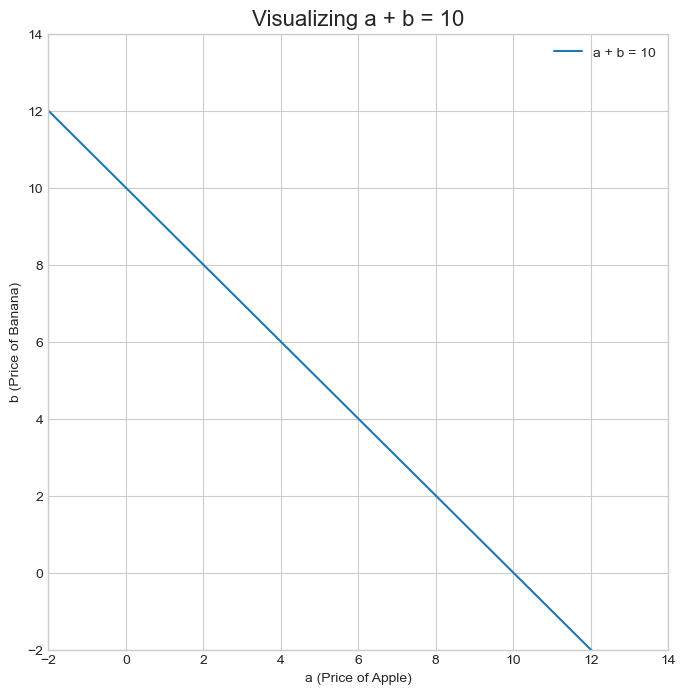

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Let 'a' be our horizontal axis, so we create a range of values for it.
a = np.linspace(-5, 15, 100)

# --- Equation 1: a + b = 10 ---
# We rearrange it to solve for b: b = 10 - a
b1 = 10 - a

# --- Equation 2: a + 2b = 12 ---
# We rearrange it to solve for b: 2b = 12 - a  =>  b = (12 - a) / 2
b2 = (12 - a) / 2

# --- Equation 3: 2a + 2b = 20 (Same as a + b = 10) ---
b3 = (20 - 2*a) / 2

# --- Equation 4: 2a + 2b = 24 (Parallel to a + b = 10) ---
b4 = (24 - 2*a) / 2


# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 14)
ax.set_ylim(-2, 14)
ax.set_xlabel('a (Price of Apple)')
ax.set_ylabel('b (Price of Banana)')
ax.set_title('Visualizing a + b = 10', fontsize=16)

# Plot the single line
ax.plot(a, b1, label='a + b = 10')

ax.legend()
plt.show()

## Case 1: The Non-Singular System (Unique Solution)

Remember this system?
1.  $a + b = 10$
2.  $a + 2b = 12$

Geometrically, this is a system of two different lines. The solution is the single point where they **intersect**. As we can see from the plot, they cross at the point **(8, 2)**. This is the one and only point that lies on *both* lines, and it's the unique solution we found algebraically.

Because the lines intersect at a single, unique point, we call this a **non-singular** system. Each equation (line) provides new, useful information.

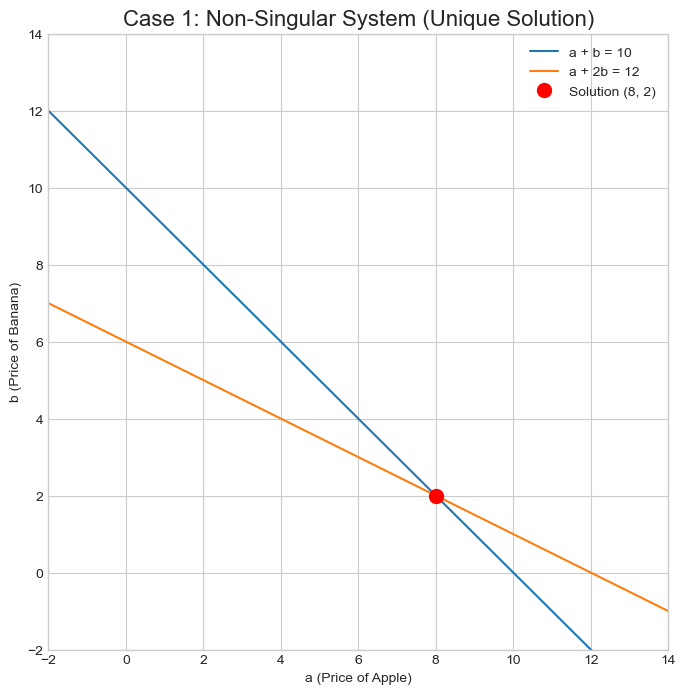

In [6]:
# Plotting Case 1: Intersecting Lines
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 14)
ax.set_ylim(-2, 14)
ax.set_xlabel('a (Price of Apple)')
ax.set_ylabel('b (Price of Banana)')
ax.set_title('Case 1: Non-Singular System (Unique Solution)', fontsize=16)

# Plot the two lines
ax.plot(a, b1, label='a + b = 10')
ax.plot(a, b2, label='a + 2b = 12')

# Mark the intersection point
ax.plot(8, 2, 'ro', markersize=10, label='Solution (8, 2)')

ax.legend()
plt.show()

## Case 2: The Redundant System (Infinite Solutions)

Now for the redundant system:
1.  $a + b = 10$
2.  $2a + 2b = 20$

The second equation is just the first one multiplied by 2. They contain the exact same information. Geometrically, this means they represent the **exact same line**.

When we plot them, the lines lie directly on top of each other. The "intersection" is the entire line itself. Since there are infinite points on a line, the system has **infinite solutions**. This is a classic **redundant** and **singular** system.

In [ ]:
# Plotting Case 2: Overlapping Lines
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 14)
ax.set_ylim(-2, 14)
ax.set_xlabel('a (Price of Apple)')
ax.set_ylabel('b (Price of Banana)')
ax.set_title('Case 2: Redundant System (Infinite Solutions)', fontsize=16)

# Plot the two lines
ax.plot(a, b1, linewidth=5, alpha=0.7, label='a + b = 10')
ax.plot(a, b3, 'k--', linewidth=2, label='2a + 2b = 20 (Same Line)')

ax.legend()
plt.show()